# Aula 12: RNNs, LSTM e GRU - Introdução às RNNs, Conceitos básicos e estrutura

## Objetivo da Aula
- Introduzir os conceitos fundamentais das Redes Neurais Recorrentes (RNNs).
- Compreender a estrutura e o funcionamento das RNNs.
- Abordar os principais desafios associados ao uso de RNNs.

### 1. Introdução às Redes Neurais Recorrentes (RNNs)

#### Motivação para o Uso de RNNs
Redes Neurais Recorrentes (RNNs) são uma classe de redes neurais especialmente adequadas para trabalhar com dados sequenciais. Diferente das redes neurais tradicionais, que assumem independência entre as entradas, as RNNs conseguem capturar dependências temporais ao manter um estado interno que é atualizado a cada passo temporal.

#### Necessidade de Modelos que Possam Lidar com Dados Sequenciais
- **Dados Sequenciais**: Muitos tipos de dados do mundo real são sequenciais, onde a ordem dos dados é crucial. Exemplos incluem séries temporais, texto, áudio, e vídeos.
- **Dependências Temporais**: Em muitos casos, a predição de um determinado valor depende de valores anteriores na sequência. RNNs são projetadas para capturar e aprender essas dependências.

#### Aplicações Comuns de RNNs
- **Processamento de Linguagem Natural (PLN)**:
  - **Tradução Automática**: Traduzir textos de um idioma para outro, onde o contexto das palavras anteriores influencia a tradução das palavras seguintes.
  - **Análise de Sentimento**: Determinar o sentimento (positivo, negativo, neutro) de um texto, onde o significado de uma palavra pode depender de palavras anteriores.
  - **Modelagem de Linguagem**: Prever a próxima palavra em uma sequência de palavras, útil em autocompletar e geração de texto.

- **Séries Temporais**:
  - **Previsão de Demanda**: Prever a demanda futura de produtos ou serviços com base em dados históricos.
  - **Análise Financeira**: Analisar dados financeiros como preços de ações para prever tendências futuras.
  - **Monitoramento de Sensores**: Analisar dados de sensores ao longo do tempo para detectar anomalias ou prever falhas.

- **Reconhecimento de Fala**:
  - **Transcrição de Áudio para Texto**: Converter fala em texto, onde o contexto temporal das palavras é essencial para a precisão da transcrição.
  - **Comandos de Voz**: Reconhecer e interpretar comandos de voz, onde a sequência de palavras pode alterar o significado do comando.

- **Gerenciamento de Diálogos**:
  - **Chatbots e Assistentes Virtuais**: Manter o contexto de uma conversa para fornecer respostas mais coerentes e relevantes.

RNNs são uma ferramenta poderosa para qualquer tarefa onde a ordem dos dados importa. Sua capacidade de manter um estado interno que é influenciado por entradas anteriores permite que capturem padrões complexos em dados sequenciais.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('acao_apple.csv')

In [4]:
df.head()

,data,valor
0,1/2/2013,79.117142
1,1/3/2013,78.268570
2,1/4/2013,76.709999
3,1/7/2013,74.571426
4,1/8/2013,75.601425


In [5]:
data = df['valor'].values.reshape(-1, 1)
data

array([[ 79.117142],
       [ 78.26857 ],
       [ 76.709999],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [6]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [7]:
# Função para criar dados de treinamento e teste
def create_dataset(data, time_step=5):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Criando dados de treinamento e teste
time_step = 3  # usando uma janela de 60 dias para prever o próximo valor
X, y = create_dataset(data, time_step)

X = X.reshape((X.shape[0], X.shape[1], 1))

In [8]:
X[1]

array([[0.19086893],
       [0.17784673],
       [0.15997849]])

In [9]:
y[0]

0.15997849033194983

In [10]:
y

array([0.15997849, 0.16858435, 0.16057534, ..., 0.95814041, 0.96566005,
       0.96164958])

In [11]:
X

array([[[0.19795893],
        [0.19086893],
        [0.17784673]],

       [[0.19086893],
        [0.17784673],
        [0.15997849]],

       [[0.17784673],
        [0.15997849],
        [0.16858435]],

       ...,

       [[0.99214607],
        [0.99640719],
        [0.96398904]],

       [[0.99640719],
        [0.96398904],
        [0.95814041]],

       [[0.96398904],
        [0.95814041],
        [0.96566005]]])

In [12]:
X.shape

(1256, 3, 1)

In [13]:
X[0].shape

(3, 1)

In [14]:
X_train = X[:int(len(X) * 0.8)]
X_test = X[int(len(X) * 0.8):]

y_train = y[:int(len(y) * 0.8)]
y_test = y[int(len(y) * 0.8):]

In [15]:
# Definindo a arquitetura da RNN
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Treinando a RNN
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/100
29/29 - 2s - 63ms/step - loss: 0.0140 - val_loss: 8.5723e-04
Epoch 2/100
29/29 - 0s - 3ms/step - loss: 0.0057 - val_loss: 4.1156e-04
Epoch 3/100
29/29 - 0s - 3ms/step - loss: 0.0029 - val_loss: 3.8307e-04
Epoch 4/100
29/29 - 0s - 3ms/step - loss: 0.0025 - val_loss: 2.9901e-04
Epoch 5/100
29/29 - 0s - 4ms/step - loss: 0.0021 - val_loss: 5.1636e-04
Epoch 6/100
29/29 - 0s - 3ms/step - loss: 0.0018 - val_loss: 4.4700e-04
Epoch 7/100
29/29 - 0s - 4ms/step - loss: 0.0016 - val_loss: 3.0632e-04
Epoch 8/100
29/29 - 0s - 4ms/step - loss: 0.0015 - val_loss: 2.6702e-04
Epoch 9/100
29/29 - 0s - 4ms/step - loss: 0.0014 - val_loss: 2.5919e-04
Epoch 10/100
29/29 - 0s - 3ms/step - loss: 0.0013 - val_loss: 2.5830e-04
Epoch 11/100
29/29 - 0s - 3ms/step - loss: 0.0013 - val_loss: 2.5338e-04
Epoch 12/100
29/29 - 0s - 3ms/step - loss: 0.0013 - val_loss: 2.4279e-04
Epoch 13/100
29/29 - 0s - 3ms/step - loss: 0.0012 - val_loss: 2.4448e-04
Epoch 14/100
29/29 - 0s - 3ms/step - loss: 0.0012 - val_los

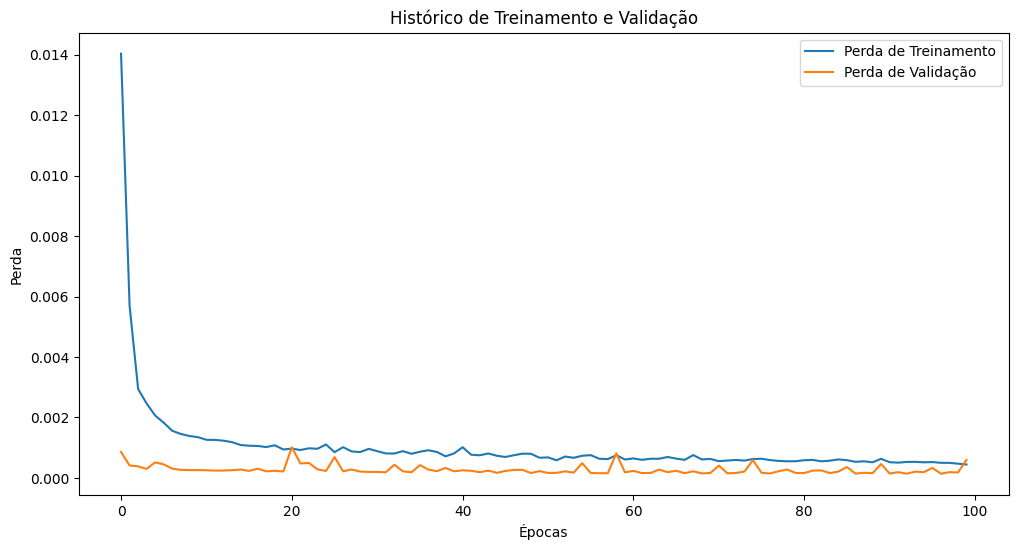

In [17]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt

# Supondo que você já tenha o objeto 'history' do treinamento do modelo

# Plotando o gráfico do histórico de treinamento
plt.figure(figsize=(12, 6))

# Plotando a perda de treinamento
plt.plot(history.history['loss'], label='Perda de Treinamento')

# Plotando a perda de validação
plt.plot(history.history['val_loss'], label='Perda de Validação')

# Adicionando título e legendas
plt.title('Histórico de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Exibindo o gráfico
plt.show()

In [18]:
# Fazendo previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [19]:
# Invertendo a normalização para obter os valores reais
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

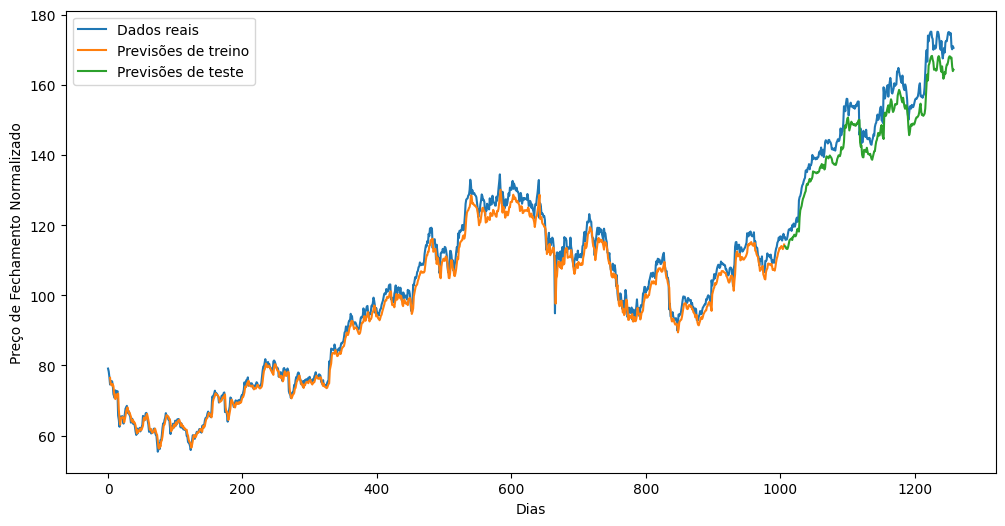

In [20]:
# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(df['valor'], label='Dados reais')
train_range = range(time_step, time_step + len(train_predict))
test_range = range(time_step + len(train_predict), time_step + len(train_predict) + len(test_predict))
plt.plot(train_range, train_predict, label='Previsões de treino')
plt.plot(test_range, test_predict, label='Previsões de teste')
plt.xlabel('Dias')
plt.ylabel('Preço de Fechamento Normalizado')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_test, test_predict):
    # Calculando MAE
    mae = mean_absolute_error(y_test, test_predict)
    
    # Calculando MSE
    mse = mean_squared_error(y_test, test_predict)
    
    # Calculando RMSE
    rmse = np.sqrt(mse)
    
    # Calculando R²
    r2 = r2_score(y_test, test_predict)
    
    # Exibindo os resultados
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Coefficient of Determination (R²): {r2}')

In [22]:
regression_metrics(y_test, test_predict)

Mean Absolute Error (MAE): 5.211506356057788
Mean Squared Error (MSE): 30.744536922790317
Root Mean Squared Error (RMSE): 5.5447756422411105
Coefficient of Determination (R²): 0.8603774125423598


In [23]:
regression_metrics(y_train, train_predict)

Mean Absolute Error (MAE): 2.1028077270984413
Mean Squared Error (MSE): 6.934925680575704
Root Mean Squared Error (RMSE): 2.6334247056970708
Coefficient of Determination (R²): 0.984721281445752


### Explicação das Métricas de Regressão

#### 1. Erro Absoluto Médio (MAE)
- **Definição**: O Erro Absoluto Médio (MAE) mede a média dos erros absolutos entre as previsões e os valores reais. Ele é a média da diferença absoluta entre as previsões e os valores reais.
- **Fórmula**: \(\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|\)
- **Interpretação**:
  - **Bom Valor**: Um valor de MAE próximo de 0 indica que as previsões estão muito próximas dos valores reais.
  - **Valor Ruim**: Um valor de MAE alto indica que há uma grande diferença entre as previsões e os valores reais.

#### 2. Erro Quadrático Médio (MSE)
- **Definição**: O Erro Quadrático Médio (MSE) mede a média dos quadrados dos erros entre as previsões e os valores reais. Ele penaliza mais os grandes erros do que os pequenos erros.
- **Fórmula**: \(\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2\)
- **Interpretação**:
  - **Bom Valor**: Um valor de MSE próximo de 0 indica que as previsões estão muito próximas dos valores reais.
  - **Valor Ruim**: Um valor de MSE alto indica que há uma grande diferença entre as previsões e os valores reais.

#### 3. Raiz do Erro Quadrático Médio (RMSE)
- **Definição**: A Raiz do Erro Quadrático Médio (RMSE) é a raiz quadrada do MSE. Ele fornece uma medida do erro em unidades comparáveis aos valores reais.
- **Fórmula**: \(\text{RMSE} = \sqrt{\text{MSE}}\)
- **Interpretação**:
  - **Bom Valor**: Um valor de RMSE próximo de 0 indica que as previsões estão muito próximas dos valores reais.
  - **Valor Ruim**: Um valor de RMSE alto indica que há uma grande diferença entre as previsões e os valores reais.

#### 4. Coeficiente de Determinação (R²)
- **Definição**: O Coeficiente de Determinação (R²) mede a proporção da variância dos valores reais que é explicada pelas previsões do modelo. Ele varia de 0 a 1, onde 1 indica um modelo perfeito.
- **Fórmula**: \(R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}\)
- **Interpretação**:
  - **Bom Valor**: Um valor de R² próximo de 1 indica que as previsões explicam bem a variância dos valores reais.
  - **Valor Ruim**: Um valor de R² próximo de 0 indica que as previsões não explicam bem a variância dos valores reais.

### Considerações Gerais:
- Para todas as métricas (MAE, MSE, RMSE), valores mais baixos são desejáveis, indicando previsões mais precisas.
- Para o coeficiente de determinação (R²), valores mais próximos de 1 são desejáveis, indicando que o modelo explica bem a variância dos dados.

Um bom modelo de regressão deve ter valores baixos para MAE, MSE e RMSE, e um valor alto para R².


### 2. Conceitos Básicos de RNNs

#### Definição e Características das RNNs
Redes Neurais Recorrentes (RNNs) são um tipo de rede neural projetada para processar sequências de dados, como séries temporais e texto. Diferente das redes neurais tradicionais (feedforward), as RNNs possuem conexões recorrentes que permitem a propagação de informações ao longo da sequência.

- **Diferenciação entre RNNs e Redes Neurais Tradicionais (Feedforward)**
  - **Redes Neurais Tradicionais**: Processam dados de forma independente, sem considerar a ordem ou dependências temporais.
  - **RNNs**: Mantêm um estado interno (memória) que é atualizado a cada passo temporal, permitindo que informações de estados anteriores influenciem a saída atual. Isso é crucial para capturar dependências temporais em dados sequenciais.

- **Capacidade das RNNs de Manter Informações sobre Estados Anteriores através de Laços de Realimentação**
  - As RNNs têm laços de realimentação que conectam os estados ocultos de diferentes passos temporais.
  - Cada estado oculto (\(h_t\)) é influenciado pela entrada atual (\(x_t\)) e pelo estado oculto do passo anterior (\(h_{t-1}\)), permitindo que a rede capture e utilize dependências temporais.

#### Equações Matemáticas Fundamentais

As equações matemáticas fundamentais das RNNs descrevem como os estados ocultos e as saídas são atualizados a cada passo temporal.

- **Equação de Ativação das RNNs**
  \[
  h_t = \sigma(W_{xh}x_t + W_{hh}h_{t-1} + b_h)
  \]
  Onde:
  - \(h_t\) é o estado oculto no tempo \(t\).
  - \(x_t\) é a entrada no tempo \(t\).
  - \(W_{xh}\) é a matriz de pesos entre a entrada e o estado oculto.
  - \(W_{hh}\) é a matriz de pesos entre o estado oculto anterior e o estado oculto atual.
  - \(b_h\) é o vetor de bias para o estado oculto.
  - \(\sigma\) é a função de ativação, geralmente uma função não linear como tanh ou ReLU.

- **Equação de Saída das RNNs**
  \[
  y_t = \sigma(W_{hy}h_t + b_y)
  \]
  Onde:
  - \(y_t\) é a saída no tempo \(t\).
  - \(h_t\) é o estado oculto no tempo \(t\).
  - \(W_{hy}\) é a matriz de pesos entre o estado oculto e a saída.
  - \(b_y\) é o vetor de bias para a saída.
  - \(\sigma\) é a função de ativação aplicada à saída.

Essas equações mostram como as RNNs processam sequências de dados, atualizando os estados ocultos a cada passo temporal e gerando saídas que dependem tanto das entradas atuais quanto dos estados ocultos anteriores. Essa capacidade de capturar dependências temporais faz das RNNs uma ferramenta poderosa para tarefas que envolvem dados sequenciais.


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('acao_google.csv')

In [26]:
df = df[['Date', 'Open', 'High', 'Low', 'Volume', 'Close']]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Volume  1258 non-null   object 
 5   Close   1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [28]:
df.head()

,Date,Open,High,Low,Volume,Close
0,1/3/2012,325.25,332.83,324.97,"7,380,500",663.59
1,1/4/2012,331.27,333.87,329.08,"5,749,400",666.45
2,1/5/2012,329.83,330.75,326.89,"6,590,300",657.21
3,1/6/2012,328.34,328.77,323.68,"5,405,900",648.24
4,1/9/2012,322.04,322.29,309.46,"11,688,800",620.76


In [29]:
# Removendo a vírgula como separador de milhar na coluna 'Volume' e convertendo para float
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)

# Removendo a vírgula como separador de milhar na coluna 'Close' e convertendo para float
df['Close'] = df['Close'].str.replace(',', '').astype(float)

In [30]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [31]:
df.describe()

,Open,High,Low,Volume,Close
count,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,533.709833,537.880223,529.007409,3.158107e+06,712.669666
std,151.904442,153.008811,150.552807,2.273726e+06,164.752591
min,279.120000,281.210000,277.220000,7.900000e+03,491.200000
25%,404.115000,406.765000,401.765000,1.621700e+06,576.740000
50%,537.470000,540.750000,532.990000,2.566150e+06,695.675000
75%,654.922500,662.587500,644.800000,4.122500e+06,782.105000
max,816.680000,816.680000,805.140000,2.497790e+07,1216.830000


In [32]:
data = df.drop('Date', axis = 1).values

In [33]:
# Função para criar dados históricos de lookback
def create_dataset(data, time_step=60):
    """
    Cria dados históricos para previsão, considerando uma janela de tempo.

    Args:
        data (np.array): O conjunto de dados de entrada, contendo as colunas 'Open', 'High', 'Low' e 'Close'.
        time_step (int): O número de passos de tempo (dias) para a janela de lookback.

    Returns:
        np.array: Os dados de entrada (X) com forma (n_amostras, time_step, n_features).
        np.array: Os dados de saída (Y) com forma (n_amostras,).
    """
    # Inicializando as listas para armazenar as sequências de entrada (X) e os valores alvo (Y)
    X, y = [], []

    # Loop para criar sequências de entrada e os valores alvo correspondentes
    for i in range(len(data) - time_step):
        # Adicionando a sequência de 'time_step' valores à lista X
        X.append(data[i:(i + time_step)])
        # Adicionando o valor de 'Close' após a sequência à lista Y
        y.append(data[i + time_step, -1])  # Usando 'Close' como o valor alvo

    # Convertendo as listas X e Y para arrays numpy
    return np.array(X), np.array(y)


## Explicação da Função `create_dataset`

### Por que esta função é necessária?

Em problemas de séries temporais, como a previsão de preços de ações, é importante capturar a dependência temporal dos dados. Isso significa que a previsão de um valor futuro depende de uma sequência de valores passados. A função `create_dataset` é usada para preparar os dados de entrada de modo a incluir essas sequências históricas (lookback) para treinar modelos de aprendizado de máquina ou deep learning.

### Como a função `create_dataset` funciona?

A função `create_dataset` recebe um conjunto de dados e um parâmetro `time_step` que define o tamanho da janela de tempo (lookback) usada para criar as sequências históricas. A função retorna duas arrays: uma contendo as sequências de entrada (`X`) e outra contendo os valores alvo correspondentes (`Y`).

### Passo a Passo da Função

1. **Inicialização**:
    - A função inicializa duas listas vazias, `X` e `Y`, para armazenar as sequências de entrada e os valores alvo, respectivamente.

2. **Loop sobre os dados**:
    - A função percorre o conjunto de dados usando um loop. Para cada posição no conjunto de dados:
        - **Sequência de entrada (`X`)**: A função coleta uma sequência de `time_step` valores e a adiciona à lista `X`.
        - **Valor alvo (`Y`)**: O valor de `Close` imediatamente após a sequência é adicionado à lista `Y`. Este é o valor que o modelo tentará prever.

3. **Conversão para arrays NumPy**:
    - Após a coleta de todas as sequências e valores alvo, as listas `X` e `Y` são convertidas para arrays NumPy para facilitar o uso em modelos de aprendizado de máquina.

### Exemplo Prático

Suponha que temos dados de preços de ações com colunas `Open`, `High`, `Low` e `Close`, e queremos prever o preço de fechamento (`Close`) usando os últimos 60 dias de dados. A função `create_dataset` será usada da seguinte maneira:

```python
data = df[['Open', 'High', 'Low', 'Close']].values  # Conjunto de dados de entrada
time_step = 60  # Tamanho da janela de lookback
X, Y = create_dataset(data, time_step)  # Criando as sequências de entrada e valores alvo


In [34]:
# Criando os dados históricos com lookback de 60 dias
time_step = 14
X, y = create_dataset(data, time_step)

In [35]:
X

array([[[3.25250e+02, 3.32830e+02, 3.24970e+02, 7.38050e+06,
         6.63590e+02],
        [3.31270e+02, 3.33870e+02, 3.29080e+02, 5.74940e+06,
         6.66450e+02],
        [3.29830e+02, 3.30750e+02, 3.26890e+02, 6.59030e+06,
         6.57210e+02],
        ...,
        [3.19300e+02, 3.19300e+02, 3.14550e+02, 1.26578e+07,
         6.37820e+02],
        [2.94160e+02, 2.94400e+02, 2.89760e+02, 2.12318e+07,
         5.84390e+02],
        [2.91910e+02, 2.93230e+02, 2.90490e+02, 6.85130e+06,
         5.83920e+02]],

       [[3.31270e+02, 3.33870e+02, 3.29080e+02, 5.74940e+06,
         6.66450e+02],
        [3.29830e+02, 3.30750e+02, 3.26890e+02, 6.59030e+06,
         6.57210e+02],
        [3.28340e+02, 3.28770e+02, 3.23680e+02, 5.40590e+06,
         6.48240e+02],
        ...,
        [2.94160e+02, 2.94400e+02, 2.89760e+02, 2.12318e+07,
         5.84390e+02],
        [2.91910e+02, 2.93230e+02, 2.90490e+02, 6.85130e+06,
         5.83920e+02],
        [2.92070e+02, 2.92740e+02, 2.87920e+02, 

In [36]:
X[0]

array([[3.25250e+02, 3.32830e+02, 3.24970e+02, 7.38050e+06, 6.63590e+02],
       [3.31270e+02, 3.33870e+02, 3.29080e+02, 5.74940e+06, 6.66450e+02],
       [3.29830e+02, 3.30750e+02, 3.26890e+02, 6.59030e+06, 6.57210e+02],
       [3.28340e+02, 3.28770e+02, 3.23680e+02, 5.40590e+06, 6.48240e+02],
       [3.22040e+02, 3.22290e+02, 3.09460e+02, 1.16888e+07, 6.20760e+02],
       [3.13700e+02, 3.15720e+02, 3.07300e+02, 8.82400e+06, 6.21430e+02],
       [3.10590e+02, 3.13520e+02, 3.09400e+02, 4.81780e+06, 6.24250e+02],
       [3.14430e+02, 3.15260e+02, 3.12080e+02, 3.76440e+06, 6.27920e+02],
       [3.11960e+02, 3.12300e+02, 3.09370e+02, 4.63180e+06, 6.23280e+02],
       [3.14810e+02, 3.14810e+02, 3.11670e+02, 3.83280e+06, 6.26860e+02],
       [3.12140e+02, 3.15820e+02, 3.09900e+02, 5.54400e+06, 6.31180e+02],
       [3.19300e+02, 3.19300e+02, 3.14550e+02, 1.26578e+07, 6.37820e+02],
       [2.94160e+02, 2.94400e+02, 2.89760e+02, 2.12318e+07, 5.84390e+02],
       [2.91910e+02, 2.93230e+02, 2.90

In [37]:
# Dividindo os dados em conjuntos de treino e teste 
X_train = X[:int(len(X) * 0.8)]
X_test = X[int(len(X) * 0.8):]

y_train = y[:int(len(y) * 0.8)]
y_test = y[int(len(y) * 0.8):]

In [38]:
# Normalizando os dados de treinamento
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_train = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [39]:
# Normalizando os dados de teste
X_test = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [40]:
# Verificando as formas dos conjuntos de dados
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (995, 14, 5)
y_train shape: (995, 1)
X_test shape: (249, 14, 5)
y_test shape: (249, 1)


In [41]:
X_train.shape[2]

5

In [42]:
X_train.shape

(995, 14, 5)

In [43]:
# Definindo a arquitetura do modelo RNN
model = Sequential()

# Adicionando uma camada RNN com 50 unidades e ativação tanh
# Esta camada processa a sequência de entrada e mantém um estado interno para capturar dependências temporais
# return_sequences=True garante que todas as saídas da sequência sejam retornadas, não apenas o último estado
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adicionando uma camada Dropout com taxa de 0.2 para evitar overfitting
# Dropout ajuda a regularizar o modelo desligando aleatoriamente uma fração das unidades durante o treinamento
model.add(Dropout(0.2))

# Adicionando uma segunda camada RNN com 50 unidades e ativação tanh
# Adiciona capacidade extra ao modelo para aprender padrões mais complexos nas sequências de entrada
# Esta camada não precisa de return_sequences=True, pois é a última camada RNN antes da camada densa
model.add(SimpleRNN(units=50, activation='tanh'))

# Adicionando uma segunda camada Dropout com taxa de 0.2 para regularização adicional
model.add(Dropout(0.2))

# Adicionando uma camada densa (fully connected) com 1 unidade
# Esta camada gera a previsão final do modelo
model.add(Dense(units=1))

# Compilando o modelo com otimizador adam e função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Exibindo a arquitetura do modelo
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 14, 50)         │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,901 (30.86 KB)

 Trainable params: 7,901 (30.86 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Estrutura e Funcionamento das RNNs

#### Arquitetura de uma RNN

A arquitetura de uma Rede Neural Recorrente (RNN) é composta por várias camadas que trabalham juntas para processar dados sequenciais. Essas camadas incluem:

- **Camada de Entrada**: Recebe os dados de entrada em uma sequência temporal. Cada elemento da sequência é processado um a um pela RNN.
- **Camadas Ocultas Recorrentes**: Estas camadas são responsáveis por manter e atualizar o estado oculto da RNN. Cada unidade recorrente dentro dessas camadas utiliza os dados de entrada atuais e o estado oculto anterior para calcular o novo estado oculto.
- **Camada de Saída**: Gera a saída da RNN a partir do estado oculto atual. A saída pode ser usada diretamente ou passar por camadas adicionais dependendo da aplicação.




#### Propagação da Informação em RNNs

**Propagação Direta (Forward Propagation)**
A propagação direta em uma RNN envolve o cálculo do estado oculto e da saída para cada elemento da sequência de entrada. O processo é realizado da seguinte forma:

1. **Estado Oculto Atual (\(h_t\))**: Calculado utilizando a entrada atual (\(x_t\)) e o estado oculto anterior (\(h_{t-1}\)):
   \[   h_t = \sigma(W_{xh}x_t + W_{hh}h_{t-1} + b_h)   \]
   Onde:
   - \(W_{xh}\) é a matriz de pesos entre a entrada e o estado oculto.
   - \(W_{hh}\) é a matriz de pesos entre o estado oculto anterior e o estado oculto atual.
   - \(b_h\) é o vetor de bias para o estado oculto.
   - \(\sigma\) é a função de ativação (e.g., tanh ou ReLU).

2. **Saída Atual (\(y_t\))**: Calculada a partir do estado oculto atual:
   \[   y_t = \sigma(W_{hy}h_t + b_y)   \]
   Onde:
   - \(W_{hy}\) é a matriz de pesos entre o estado oculto e a saída.
   - \(b_y\) é o vetor de bias para a saída.
   - \(\sigma\) é a função de ativação aplicada à saída.

**Propagação Retroativa (Backpropagation Through Time - BPTT)**
A propagação retroativa em RNNs, conhecida como Backpropagation Through Time (BPTT), é o método utilizado para treinar a rede ajustando os pesos com base nos erros de predição. O processo envolve:

1. **Cálculo do Erro**: O erro é calculado comparando a saída da RNN com o valor esperado (ground truth).

2. **Propagação do Erro Através do Tempo**: O erro é propagado para trás através do tempo, atualizando os pesos não apenas com base no estado atual, mas também considerando como os estados anteriores influenciaram o estado atual.

3. **Atualização dos Pesos**: Os pesos da RNN são ajustados para minimizar o erro de predição utilizando gradientes calculados durante a propagação retroativa.

Este processo permite que a RNN aprenda a ajustar seus parâmetros para capturar melhor as dependências temporais nos dados sequenciais, melhorando sua capacidade de fazer previsões precisas.


In [44]:
# Treinando a RNN
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/100
28/28 - 3s - 107ms/step - loss: 0.3721 - val_loss: 0.0018
Epoch 2/100
28/28 - 0s - 6ms/step - loss: 0.1252 - val_loss: 0.0167
Epoch 3/100
28/28 - 0s - 6ms/step - loss: 0.0780 - val_loss: 0.0086
Epoch 4/100
28/28 - 0s - 6ms/step - loss: 0.0506 - val_loss: 0.0046
Epoch 5/100
28/28 - 0s - 6ms/step - loss: 0.0430 - val_loss: 0.0301
Epoch 6/100
28/28 - 0s - 6ms/step - loss: 0.0339 - val_loss: 0.0012
Epoch 7/100
28/28 - 0s - 6ms/step - loss: 0.0287 - val_loss: 0.0127
Epoch 8/100
28/28 - 0s - 6ms/step - loss: 0.0286 - val_loss: 0.0108
Epoch 9/100
28/28 - 0s - 6ms/step - loss: 0.0204 - val_loss: 0.0057
Epoch 10/100
28/28 - 0s - 6ms/step - loss: 0.0207 - val_loss: 0.0034
Epoch 11/100
28/28 - 0s - 6ms/step - loss: 0.0185 - val_loss: 0.0036
Epoch 12/100
28/28 - 0s - 6ms/step - loss: 0.0160 - val_loss: 0.0024
Epoch 13/100
28/28 - 0s - 6ms/step - loss: 0.0173 - val_loss: 9.7074e-04
Epoch 14/100
28/28 - 0s - 6ms/step - loss: 0.0139 - val_loss: 0.0035
Epoch 15/100
28/28 - 0s - 6ms/step - 

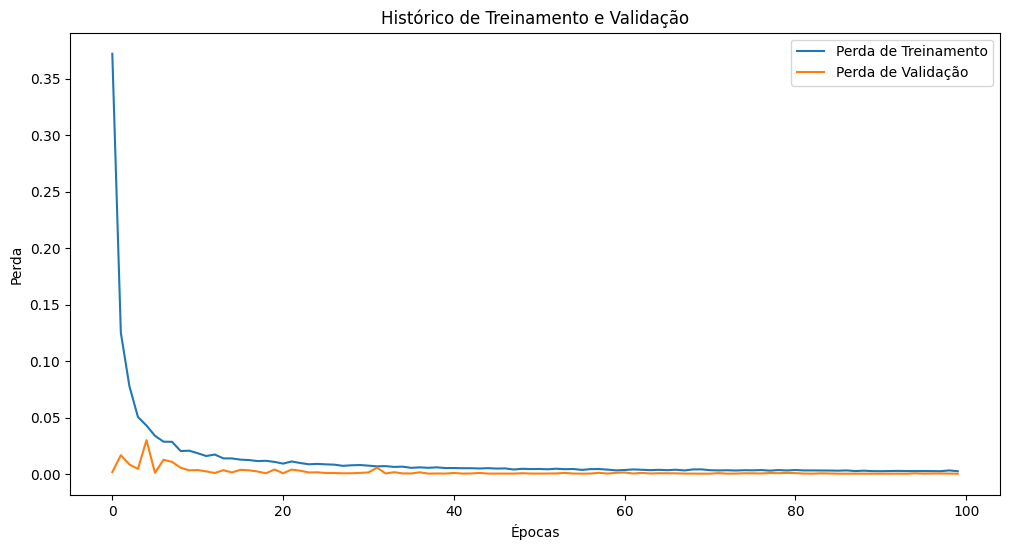

In [45]:
plt.figure(figsize=(12, 6))

# Plotando a perda de treinamento
plt.plot(history.history['loss'], label='Perda de Treinamento')

# Plotando a perda de validação
plt.plot(history.history['val_loss'], label='Perda de Validação')

# Adicionando título e legendas
plt.title('Histórico de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Exibindo o gráfico
plt.show()

In [46]:
# Fazendo previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertendo a normalização para obter os valores reais
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


### 4. Problemas de RNNs: Desvanecimento e Explosão de Gradientes

#### Desafios com Gradientes em RNNs

As Redes Neurais Recorrentes (RNNs) enfrentam dois problemas principais durante o treinamento: desvanecimento de gradientes e explosão de gradientes. Ambos os problemas ocorrem devido à maneira como os gradientes são propagados através do tempo na rede.

- **Problemas de Desvanecimento de Gradientes**
  - **Descrição**: Ocorre quando os gradientes dos erros em relação aos pesos tornam-se extremamente pequenos durante a propagação retroativa (backpropagation through time - BPTT).
  - **Causa**: Quando a função de ativação utilizada tem derivadas pequenas (como a tanh e a sigmoid), os gradientes podem diminuir exponencialmente à medida que são propagados para trás ao longo de muitos passos temporais.
  - **Impacto**: Pesos nas camadas iniciais da rede são ajustados muito pouco, resultando em uma aprendizagem lenta ou estagnada para essas camadas. A rede tem dificuldade em aprender dependências de longo prazo.

- **Problemas de Explosão de Gradientes**
  - **Descrição**: Ocorre quando os gradientes dos erros em relação aos pesos tornam-se extremamente grandes durante a BPTT.
  - **Causa**: Quando os pesos da rede são grandes ou quando a função de ativação tem derivadas grandes, os gradientes podem aumentar exponencialmente à medida que são propagados para trás ao longo de muitos passos temporais.
  - **Impacto**: Pesos nas camadas iniciais da rede são ajustados excessivamente, resultando em atualizações instáveis dos pesos e em possíveis falhas no treinamento.

#### Técnicas para Mitigar Desafios

Para lidar com os problemas de desvanecimento e explosão de gradientes em RNNs, várias técnicas podem ser aplicadas:

- **Métodos de Regularização**
  - **Dropout**: Uma técnica que consiste em desligar (definir como zero) aleatoriamente algumas unidades na rede durante o treinamento. Isso ajuda a prevenir o overfitting e pode estabilizar a atualização dos pesos.
  - **Regularização L2**: Adiciona uma penalidade ao custo total da rede baseada na magnitude dos pesos. Isso ajuda a manter os pesos pequenos e estabiliza a propagação dos gradientes.

- **Uso de Funções de Ativação Apropriadas**
  - **ReLU (Rectified Linear Unit)**: Funciona bem para evitar desvanecimento de gradientes, mas pode levar à explosão de gradientes se não for combinado com outras técnicas de normalização.
  - **Leaky ReLU**: Uma variação do ReLU que permite pequenos valores negativos, ajudando a manter um fluxo de gradientes mesmo para neurônios que, de outra forma, estariam inativos.

- **Normalização de Gradientes**
  - **Clipping de Gradientes**: Limita o valor máximo dos gradientes durante a BPTT. Quando os gradientes excedem um determinado limiar, eles são ajustados para esse valor limite. Isso ajuda a prevenir a explosão de gradientes.
  - **Batch Normalization**: Normaliza a entrada de cada camada com base nas estatísticas de mini-batches durante o treinamento. Isso ajuda a estabilizar e acelerar a convergência.




## Referências
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
- Olah, C. (2015). Understanding LSTM Networks. [Link para o artigo](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

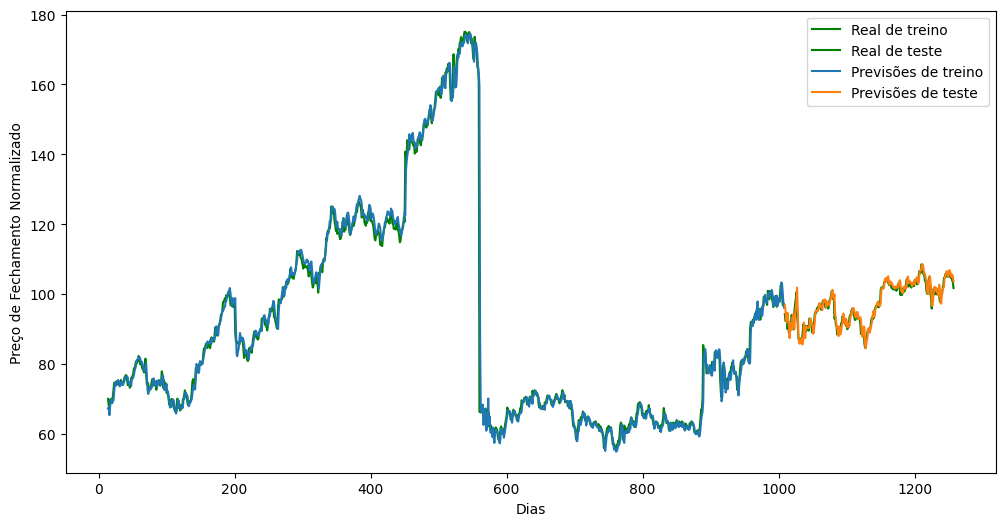

In [47]:
# Plotando os resultados
plt.figure(figsize=(12, 6))
train_range = range(time_step, time_step + len(train_predict))
test_range = range(time_step + len(train_predict), time_step + len(train_predict) + len(test_predict))
plt.plot(train_range, y_train, label='Real de treino', color='green')
plt.plot(test_range, y_test, label='Real de teste', color='green')
plt.plot(train_range, train_predict, label='Previsões de treino')
plt.plot(test_range, test_predict, label='Previsões de teste')
plt.xlabel('Dias')
plt.ylabel('Preço de Fechamento Normalizado')
plt.legend()
plt.show()

In [48]:
regression_metrics(y_test, test_predict)

Mean Absolute Error (MAE): 1.3097103956821439
Mean Squared Error (MSE): 3.004114903318992
Root Mean Squared Error (RMSE): 1.7332382707865044
Coefficient of Determination (R²): 0.9077280793926554


In [49]:
regression_metrics(y_train, train_predict)

Mean Absolute Error (MAE): 1.5153781312351222
Mean Squared Error (MSE): 13.132581222857764
Root Mean Squared Error (RMSE): 3.6238903436580094
Coefficient of Determination (R²): 0.9856358159230021


## Exercícios de Análise de Séries Temporais com Ethereum (ETH)

1. **Leitura dos Dados**
   - Leia a base de dados de preço da moeda Ethereum (ETH).

2. **Seleção dos Dados**
   - Use todos os dados exceto a coluna de data.

3. **Definição de X e Y**
   - Defina `X` e `y` considerando o valor dos últimos 10 dias para previsão.

4. **Separação em Treinamento e Teste**
   - Separe os dados em conjuntos de treinamento e teste, utilizando 20% das datas mais recentes para o conjunto de teste.

5. **Normalização dos Dados de Treinamento**
   - Normalize `X` e `y` de treinamento usando `fit_transform`.

6. **Normalização dos Dados de Teste**
   - Normalize `X` e `y` de teste usando `transform`.

7. **Definição do Modelo**
   - Defina uma estrutura de Rede Neural Recorrente para o tratamento dos dados.

8. **Treinamento do Modelo**
   - Treine o modelo utilizando 5% dos dados de treinamento para validação.

9. **Visualização do Histórico de Treinamento**
   - Exiba o gráfico de perda (`loss`) de treinamento e validação.

10. **Previsão com Dados de Teste**
    - Faça previsões utilizando os dados de teste.

11. **Desnormalização das Previsões**
    - Desnormalize as previsões de teste e o `y` de teste para obter valores em escala real.

12. **Exibição de Métricas de Regressão**
    - Exiba as métricas de regressão para avaliar o desempenho do modelo nas previsões.

In [50]:
df = pd.read_csv('preco_eth.csv')

In [51]:
df

,Date,Open,High,Low,Close,Volume
0,2/23/2022,2639.447021,2741.368408,2587.412842,2590.359619,13382637240
1,2/22/2022,2572.898682,2648.916748,2510.678711,2639.299316,16360200507
2,2/21/2022,2627.665527,2752.458496,2568.254395,2573.816162,18646392740
3,2/20/2022,2763.756592,2763.756592,2585.946289,2628.648438,11641437834
4,2/19/2022,2784.872803,2826.347900,2707.378418,2763.701172,9774183169
...,...,...,...,...,...,...
1563,11/13/2017,307.024994,328.415009,307.024994,316.716003,1041889984
1564,11/12/2017,314.690002,319.153015,298.513000,307.907990,1613479936
1565,11/11/2017,298.585999,319.453003,298.191986,314.681000,842300992
1566,11/10/2017,320.670990,324.717987,294.541992,299.252991,885985984


In [52]:
df.drop(columns='Date', axis=1, inplace=True)


In [53]:
# Criando os dados históricos com lookback de 60 dias
time_step = 10
X, y = create_dataset(data, time_step)

In [54]:
# Dividindo os dados em conjuntos de treino e teste 
X_train = X[:int(len(X) * 0.8)]
X_test = X[int(len(X) * 0.8):]

y_train = y[:int(len(y) * 0.8)]
y_test = y[int(len(y) * 0.8):]

In [55]:
# Normalizando os dados de treinamento
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_train = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [56]:
# Normalizando os dados de teste
X_test = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [ ]:
# Definindo a arquitetura do modelo RNN
model = Sequential()

# Adicionando uma camada RNN com 50 unidades e ativação tanh
# Esta camada processa a sequência de entrada e mantém um estado interno para capturar dependências temporais
# return_sequences=True garante que todas as saídas da sequência sejam retornadas, não apenas o último estado
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adicionando uma camada Dropout com taxa de 0.2 para evitar overfitting
# Dropout ajuda a regularizar o modelo desligando aleatoriamente uma fração das unidades durante o treinamento
model.add(Dropout(0.2))

# Adicionando uma segunda camada RNN com 50 unidades e ativação tanh
# Adiciona capacidade extra ao modelo para aprender padrões mais complexos nas sequências de entrada
# Esta camada não precisa de return_sequences=True, pois é a última camada RNN antes da camada densa
model.add(SimpleRNN(units=50, activation='tanh'))

# Adicionando uma segunda camada Dropout com taxa de 0.2 para regularização adicional
model.add(Dropout(0.2))

# Adicionando uma camada densa (fully connected) com 1 unidade
# Esta camada gera a previsão final do modelo
model.add(Dense(units=1))

# Compilando o modelo com otimizador adam e função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Exibindo a arquitetura do modelo
model.summary()


In [57]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.05, verbose=2)

Epoch 1/100
30/30 - 3s - 103ms/step - loss: 0.0036 - val_loss: 4.3140e-04
Epoch 2/100
30/30 - 0s - 9ms/step - loss: 0.0032 - val_loss: 7.7610e-04
Epoch 3/100
30/30 - 0s - 9ms/step - loss: 0.0029 - val_loss: 3.2421e-04
Epoch 4/100
30/30 - 0s - 8ms/step - loss: 0.0025 - val_loss: 3.7996e-04
Epoch 5/100
30/30 - 0s - 5ms/step - loss: 0.0033 - val_loss: 2.8949e-04
Epoch 6/100
30/30 - 0s - 7ms/step - loss: 0.0027 - val_loss: 3.2063e-04
Epoch 7/100
30/30 - 0s - 9ms/step - loss: 0.0022 - val_loss: 3.4931e-04
Epoch 8/100
30/30 - 0s - 9ms/step - loss: 0.0025 - val_loss: 4.6509e-04
Epoch 9/100
30/30 - 0s - 11ms/step - loss: 0.0024 - val_loss: 3.0730e-04
Epoch 10/100
30/30 - 0s - 8ms/step - loss: 0.0027 - val_loss: 3.2918e-04
Epoch 11/100
30/30 - 0s - 5ms/step - loss: 0.0027 - val_loss: 4.0134e-04
Epoch 12/100
30/30 - 0s - 6ms/step - loss: 0.0024 - val_loss: 3.6409e-04
Epoch 13/100
30/30 - 0s - 5ms/step - loss: 0.0024 - val_loss: 6.8205e-04
Epoch 14/100
30/30 - 0s - 5ms/step - loss: 0.0023 - val_l

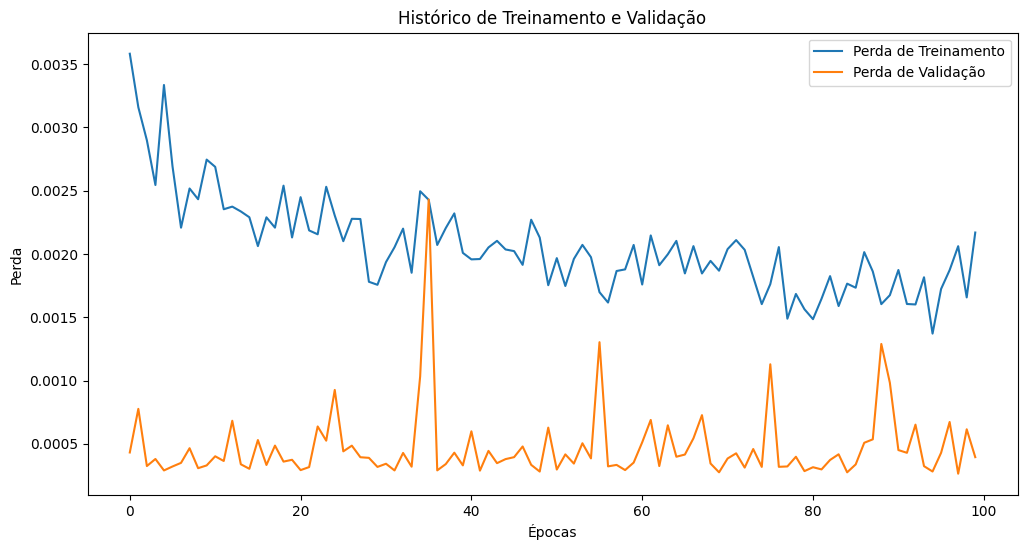

In [58]:
plt.figure(figsize=(12, 6))

# Plotando a perda de treinamento
plt.plot(history.history['loss'], label='Perda de Treinamento')

# Plotando a perda de validação
plt.plot(history.history['val_loss'], label='Perda de Validação')

# Adicionando título e legendas
plt.title('Histórico de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Exibindo o gráfico
plt.show()

In [59]:
# Fazendo previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertendo a normalização para obter os valores reais
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [60]:
regression_metrics(y_test, test_predict)

Mean Absolute Error (MAE): 1.7843550795079701
Mean Squared Error (MSE): 4.861326761302141
Root Mean Squared Error (RMSE): 2.204841663544605
Coefficient of Determination (R²): 0.8500838316287799


In [61]:
regression_metrics(y_train, train_predict)

Mean Absolute Error (MAE): 1.5746124640180648
Mean Squared Error (MSE): 12.77397242724012
Root Mean Squared Error (RMSE): 3.574069449134994
Coefficient of Determination (R²): 0.986002023893535
